In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
timeseries_path = os.path.join('COVID-19', 'csse_covid_19_data', 'csse_covid_19_time_series')

timeseries_deaths = pd.read_csv(os.path.join(timeseries_path, 'time_series_covid19_deaths_global.csv'))
timeseries_recovered = pd.read_csv(os.path.join(timeseries_path, 'time_series_covid19_recovered_global.csv'))

timeseries_cases = pd.read_csv(os.path.join(timeseries_path, 'time_series_covid19_confirmed_global.csv'))
timeseries_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,444,484,521,555,607,665,714,784,840,906
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,400,409,416,433,446,467,475,494,518,539
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,564,583,601,601,638,646,659,673,673,696
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19


In [5]:
country = 'Netherlands'

In [6]:
timeseries_deaths = timeseries_deaths[timeseries_deaths['Country/Region'] == country]
timeseries_recovered = timeseries_recovered[timeseries_recovered['Country/Region'] == country]
timeseries_cases = timeseries_cases[timeseries_cases['Country/Region'] == country]
timeseries_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
166,Aruba,Netherlands,12.5186,-70.0358,0,0,0,0,0,0,...,77,82,86,92,92,92,92,93,95,96
167,Curacao,Netherlands,12.1696,-68.9900,0,0,0,0,0,0,...,14,14,14,14,14,14,14,14,14,14
168,Sint Maarten,Netherlands,18.0425,-63.0548,0,0,0,0,0,0,...,40,43,50,50,50,50,52,53,57,57
169,NaN,Netherlands,52.1326,5.2913,0,0,0,0,0,0,...,20549,21762,23097,24413,25587,26551,27419,28153,29214,30449
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.1784,-68.2385,0,0,0,0,0,0,...,2,2,2,2,3,3,3,3,3,3


In [14]:
timeseries_cases = timeseries_cases[timeseries_cases['Province/State'].isnull()]
timeseries_deaths = timeseries_cases[timeseries_cases['Province/State'].isnull()]
timeseries_recovered = timeseries_cases[timeseries_cases['Province/State'].isnull()]

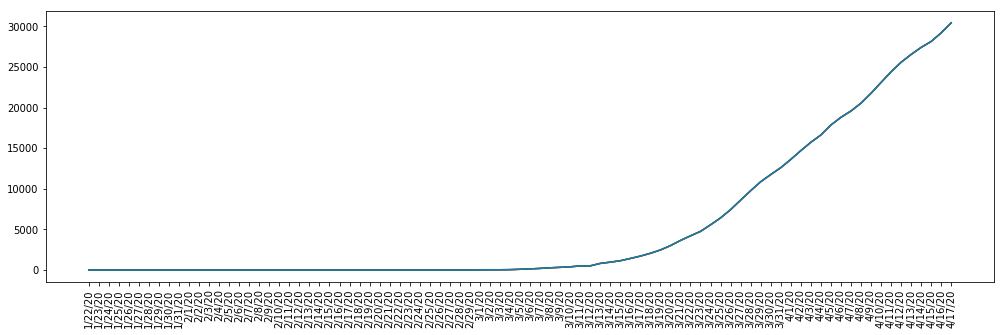

In [15]:
timeseries_cases_day = timeseries_cases.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).iloc[0]
timeseries_deaths_day = timeseries_deaths.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).iloc[0]
timeseries_recovered_day = timeseries_recovered.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).iloc[0]

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)
ax.plot(timeseries_deaths_day, c='r')
ax.plot(timeseries_recovered_day, c='g')
ax.plot(timeseries_cases_day)

plt.xticks(rotation=90)
plt.show()

/Users/melvinkoopmans/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


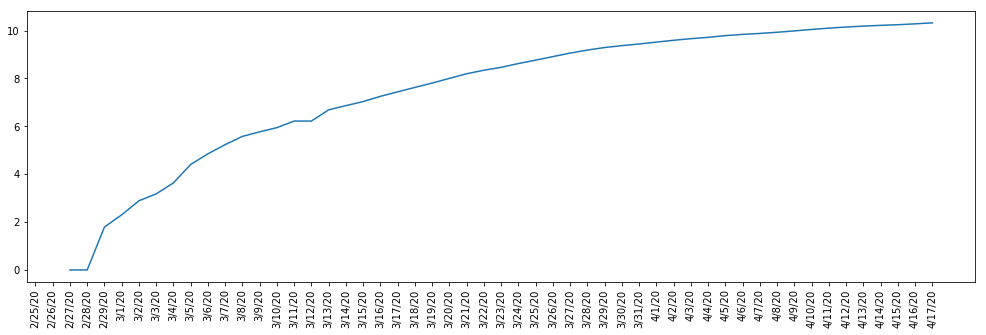

In [16]:
log_timeseries_cases_day = np.log(timeseries_cases_day)

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)
ax.plot(log_timeseries_cases_day)

plt.xticks(rotation=90)
plt.show()

In [17]:
n_days = 7
last_n_days = timeseries_cases_day[-n_days:]

print('Amount increased by a factor of {}x in the last {} days.'.format(int(last_n_days[-1] / last_n_days[0]), n_days))
print('The current growth-factor is: {}.'.format(round(last_n_days[-1] / last_n_days[-2], 2)))
print('Current rate of death is {}% by cases.'.format(round(timeseries_deaths_day.sum() / timeseries_cases_day.sum(), 2)))
print('Current rate of death is {}% by recovered.'.format('?' if timeseries_recovered_day.sum() == 0 else round(timeseries_deaths_day.sum() / timeseries_recovered_day.sum(), 2)))

Amount increased by a factor of 1x in the last 7 days.
The current growth-factor is: 1.04.
Current rate of death is 1.0% by cases.
Current rate of death is 1.0% by recovered.


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
cases_from_start = log_timeseries_cases_day[log_timeseries_cases_day > 0]

X = np.arange(1, len(cases_from_start) + 1, 1).reshape(-1, 1)
y = cases_from_start.values

log_res = LinearRegression()
log_res.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
from datetime import datetime, timedelta

n_days = 7

start_datetime = datetime.strptime(cases_from_start.index[0], '%m/%d/%y')

days = []
current_day = start_datetime

for day in np.arange(1, len(cases_from_start) + 1 + n_days):
    current_day = current_day + timedelta(days=1)
    days.append(current_day.strftime('%m/%d/%Y'))

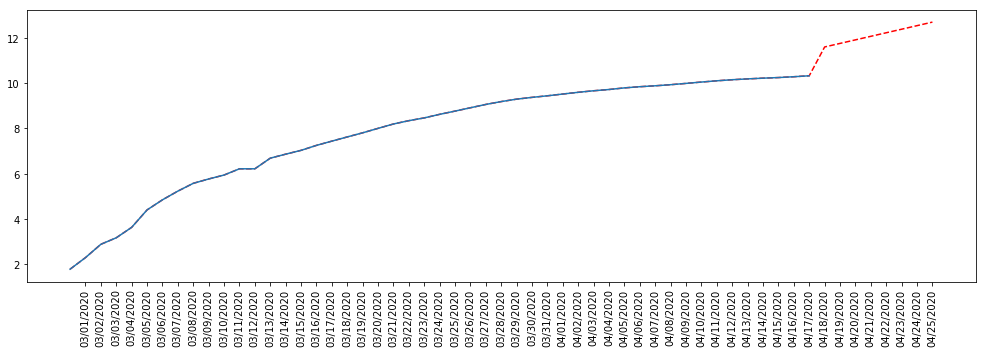

In [21]:
predictions = log_res.predict(np.arange(len(cases_from_start), len(cases_from_start) + 1 + n_days, 1).reshape(-1, 1))
predictions = np.concatenate([cases_from_start, predictions])

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)
ax.plot(predictions, c='r', linestyle='--')
ax.set_xticks(np.arange(1, len(cases_from_start) + 1 + n_days, 1))
ax.set_xticklabels(days)
ax.plot(cases_from_start)

plt.xticks(rotation=90)
plt.show()

[108557. 126970. 148506. 173696. 203158. 237617. 277921. 325062.]


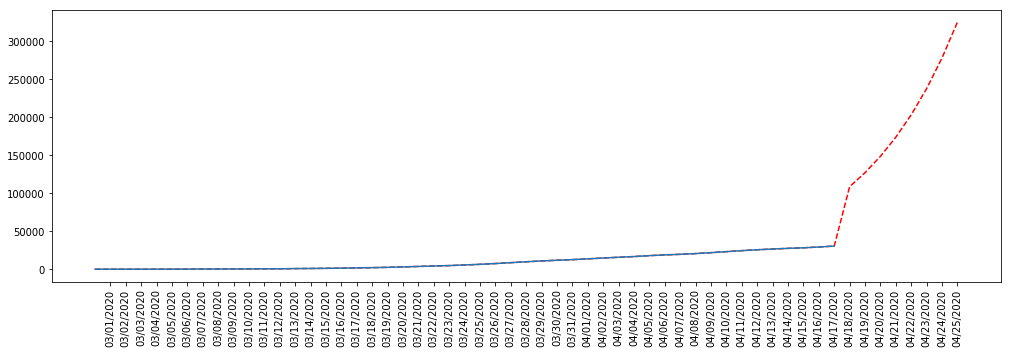

In [22]:
predictions_normal_scale = np.exp(predictions)
cases_from_start_normal = np.exp(cases_from_start)

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)
ax.plot(predictions_normal_scale, c='r', linestyle='--')
ax.set_xticks(np.arange(1, len(cases_from_start_normal) + 1 + n_days, 1))
ax.set_xticklabels(days)
ax.plot(cases_from_start_normal)

print(np.round(predictions_normal_scale[-n_days - 1:]))
plt.xticks(rotation=90)
plt.show()